# TensorFlow EfficientNetB0 — End-to-End

# Sea Animals Image Classification — End-to-End
This notebook runs **split → train → evaluate → predict** for one algorithm.
**Expected folder on your machine** (run this notebook from your project root):

```
Sea-Animals-Image-DatasetProject/
├── Sea Animals Image Dataset/   # raw classes folders
├── FishDataset/                 # will be created (train/val)
└── models/                      # will be created (artifacts)
```

> If your raw dataset folder is named differently (e.g., `Sea_Animals_Image_Dataset`), edit the `DATASET_CANDIDATE_NAMES` list in the split cell.


## 0) Optional installs (run if needed)

In [1]:
## !pip install tensorflow matplotlib scikit-learn pillow

## 1) Setup paths

In [2]:
# Paths and basic setup
from pathlib import Path
import os, shutil, random, time
from sklearn.model_selection import train_test_split

ROOT = Path.cwd()
RAW_DIR = None
DATASET_CANDIDATE_NAMES = [
    "Sea Animals Image Dataset",
    "Sea_Animals_Image_Dataset",
    "SeaAnimalsImageDataset",
]

for name in DATASET_CANDIDATE_NAMES:
    cand = ROOT / name
    if cand.exists() and cand.is_dir():
        RAW_DIR = cand
        break

if RAW_DIR is None:
    raise FileNotFoundError(
        "Raw dataset folder not found. Create a folder named one of: "
        + ", ".join(DATASET_CANDIDATE_NAMES)
        + " inside your project root."
    )

FISHDATASET = ROOT / "FishDataset"
TRAIN_DIR = FISHDATASET / "train"
VAL_DIR = FISHDATASET / "val"
MODELS_DIR = ROOT / "models"
MODELS_DIR.mkdir(exist_ok=True, parents=True)

print("Project root:", ROOT)
print("Raw dataset :", RAW_DIR)
print("FishDataset :", FISHDATASET)
print("Models dir  :", MODELS_DIR)


Project root: f:\Git\Sea Animals Image DatasetProject
Raw dataset : f:\Git\Sea Animals Image DatasetProject\Sea Animals Image Dataset
FishDataset : f:\Git\Sea Animals Image DatasetProject\FishDataset
Models dir  : f:\Git\Sea Animals Image DatasetProject\models


## 2) Split dataset (80/20)

In [3]:
# Split raw dataset into train/val (80/20) — idempotent
import os, shutil
from sklearn.model_selection import train_test_split

TRAIN_DIR.mkdir(parents=True, exist_ok=True)
VAL_DIR.mkdir(parents=True, exist_ok=True)

classes = [d for d in RAW_DIR.iterdir() if d.is_dir()]
if not classes:
    raise RuntimeError(f"No class folders found under {RAW_DIR}")

count_summary = []
for cls_path in classes:
    cls = cls_path.name
    images = [p for p in cls_path.iterdir() if p.suffix.lower() in {".jpg",".jpeg",".png"}]
    if not images:
        print("Skip (no images):", cls)
        continue
    from sklearn.model_selection import train_test_split
    train, val = train_test_split(images, test_size=0.2, random_state=42)
    (TRAIN_DIR/cls).mkdir(parents=True, exist_ok=True)
    (VAL_DIR/cls).mkdir(parents=True, exist_ok=True)
    for src in train:
        dst = TRAIN_DIR/cls/src.name
        if not dst.exists():
            shutil.copy2(src, dst)
    for src in val:
        dst = VAL_DIR/cls/src.name
        if not dst.exists():
            shutil.copy2(src, dst)
    count_summary.append((cls, len(train), len(val)))
    print(f"Class {cls}: {len(train)} train / {len(val)} val")

print("✅ Split done → FishDataset/train & FishDataset/val")
count_summary


Class Clams: 397 train / 100 val
Class Corals: 400 train / 100 val
Class Crabs: 399 train / 100 val
Class Dolphin: 625 train / 157 val
Class Eel: 397 train / 100 val
Class Fish: 395 train / 99 val
Class Jelly Fish: 676 train / 169 val
Class Lobster: 399 train / 100 val
Class Nudibranchs: 400 train / 100 val
Class Octopus: 449 train / 113 val
Class Otter: 400 train / 100 val
Class Penguin: 385 train / 97 val
Class Puffers: 424 train / 107 val
Class Sea Rays: 413 train / 104 val
Class Sea Urchins: 463 train / 116 val
Class Seahorse: 382 train / 96 val
Class Seal: 331 train / 83 val
Class Sharks: 472 train / 118 val
Class Shrimp: 390 train / 98 val
Class Squid: 386 train / 97 val
Class Starfish: 399 train / 100 val
Class Turtle_Tortoise: 216 train / 55 val
✅ Split done → FishDataset/train & FishDataset/val


[('Clams', 397, 100),
 ('Corals', 400, 100),
 ('Crabs', 399, 100),
 ('Dolphin', 625, 157),
 ('Eel', 397, 100),
 ('Fish', 395, 99),
 ('Jelly Fish', 676, 169),
 ('Lobster', 399, 100),
 ('Nudibranchs', 400, 100),
 ('Octopus', 449, 113),
 ('Otter', 400, 100),
 ('Penguin', 385, 97),
 ('Puffers', 424, 107),
 ('Sea Rays', 413, 104),
 ('Sea Urchins', 463, 116),
 ('Seahorse', 382, 96),
 ('Seal', 331, 83),
 ('Sharks', 472, 118),
 ('Shrimp', 390, 98),
 ('Squid', 386, 97),
 ('Starfish', 399, 100),
 ('Turtle_Tortoise', 216, 55)]

## 3) Train

Found 9198 images belonging to 22 classes.
Found 2309 images belonging to 22 classes.
Epoch 1/15
288/288 ━━━━━━━━━━━━━━━━━━━━ 367s 1s/step - accuracy: 0.0645 - loss: 3.0901 - val_accuracy: 0.0732 - val_loss: 3.0718 - learning_rate: 1.0000e-04
Epoch 2/15
288/288 ━━━━━━━━━━━━━━━━━━━━ 282s 978ms/step - accuracy: 0.0740 - loss: 3.0757 - val_accuracy: 0.0732 - val_loss: 3.0604 - learning_rate: 1.0000e-04
Epoch 3/15
288/288 ━━━━━━━━━━━━━━━━━━━━ 299s 1s/step - accuracy: 0.0778 - loss: 3.0631 - val_accuracy: 0.0944 - val_loss: 3.0467 - learning_rate: 1.0000e-04
Epoch 4/15
288/288 ━━━━━━━━━━━━━━━━━━━━ 326s 1s/step - accuracy: 0.0857 - loss: 3.0110 - val_accuracy: 0.0741 - val_loss: 3.1668 - learning_rate: 1.0000e-04
Epoch 5/15
288/288 ━━━━━━━━━━━━━━━━━━━━ 324s 1s/step - accuracy: 0.0987 - loss: 2.9480 - val_accuracy: 0.0502 - val_loss: 3.9116 - learning_rate: 1.0000e-04
Epoch 6/15
288/288 ━━━━━━━━━━━━━━━━━━━━ 309s 1s/step - accuracy: 0.0963 - loss: 2.9171 - val_accuracy: 0.0931 - val_loss: 2.98

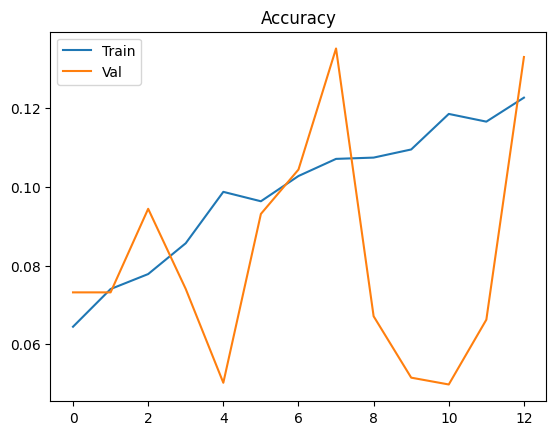

✅ Saved best and final models under: f:\Git\Sea Animals Image DatasetProject\models


In [4]:
# Train EfficientNetB0
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import json

datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.15,
    height_shift_range=0.15,
    zoom_range=0.2,
    horizontal_flip=True
)

train_data = datagen.flow_from_directory(TRAIN_DIR, target_size=(224,224), batch_size=32)
val_data   = datagen.flow_from_directory(VAL_DIR,   target_size=(224,224), batch_size=32)

base = EfficientNetB0(weights="imagenet", include_top=False, input_shape=(224,224,3))
for layer in base.layers[:-20]:
    layer.trainable = False

x = GlobalAveragePooling2D()(base.output)
x = Dropout(0.3)(x)
x = Dense(256, activation="relu")(x)
out = Dense(train_data.num_classes, activation="softmax")(x)

model = Model(inputs=base.input, outputs=out)
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4), loss="categorical_crossentropy", metrics=["accuracy"])

ckpt = ModelCheckpoint(MODELS_DIR / "tf_efficientnet_best.keras", monitor="val_accuracy", save_best_only=True, mode="max")
early = EarlyStopping(monitor="val_accuracy", patience=5, restore_best_weights=True)
reduce = ReduceLROnPlateau(monitor="val_loss", factor=0.3, patience=3, verbose=1)

history = model.fit(train_data, validation_data=val_data, epochs=15, callbacks=[ckpt, early, reduce])

plt.figure()
plt.plot(history.history["accuracy"], label="Train")
plt.plot(history.history["val_accuracy"], label="Val")
plt.title("Accuracy")
plt.legend()
plt.savefig(MODELS_DIR / "tf_efficientnet_accuracy.png")
plt.show()

model.save(MODELS_DIR / "tf_efficientnet_final.keras")
with open(MODELS_DIR / "tf_class_indices.json", "w") as f:
    json.dump(train_data.class_indices, f, indent=2)

print("✅ Saved best and final models under:", MODELS_DIR)

## 4) Predict

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
✅ Prediction: Jelly Fish (9.38%) — f:\Git\Sea Animals Image DatasetProject\FishDataset\val\Sharks\17853248380_26b450fae6_o.jpg


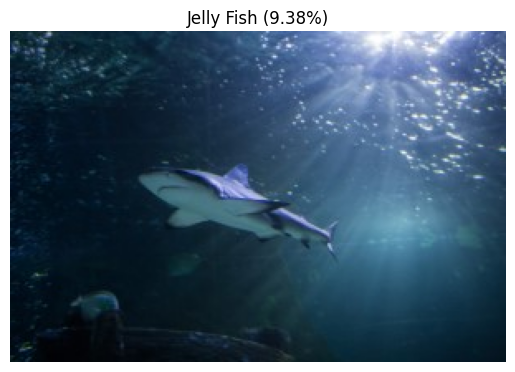

In [22]:
# Predict on a random validation image
import tensorflow as tf, numpy as np, json, random
import matplotlib.pyplot as plt
import cv2

model_path = MODELS_DIR / "tf_efficientnet_best.keras"
model = tf.keras.models.load_model(model_path)

with open(MODELS_DIR / "tf_class_indices.json") as f:
    idx = json.load(f)
idx2label = {v:k for k,v in idx.items()}

candidates = list(VAL_DIR.glob("*/*.jpg"))
sample = random.choice(candidates)
img = cv2.imread(str(sample))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_res = cv2.resize(img_rgb, (224,224))
x = np.expand_dims(img_res/255.0, axis=0)

pred = model.predict(x)[0]
i = int(np.argmax(pred))
label = idx2label[i]
conf = float(pred[i])*100

print(f'✅ Prediction: {label} ({conf:.2f}%) — {sample}')
plt.imshow(img_rgb)
plt.axis("off")
plt.title(f"{label} ({conf:.2f}%)")
plt.show()